# K nearest neighbours

## Learning objectives
- Implement the K nearest neighbour classification algorithm from scratch
- Understand the difference between parametric and non-parametric models

## Intro - the algorithm

K-nearest neighbours is an extremely simple algorithm. Simply predict the label for any input to be the average of the K-nearest neighbours.

## What is the model here?

Interestingly, the model is completely defined by the data. There are no model parameters. We call the predictor a non-parametric model in this case. All of the previous models that we have seen have been parametric.

Let's implement it.

(10, 2)
(10,)


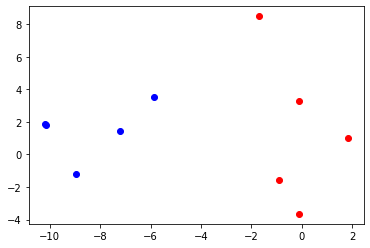

In [58]:
import pandas as pd
import sklearn.datasets
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

X, Y = sklearn.datasets.make_blobs(n_samples=10, n_features=2, centers=2, cluster_std=3.0)#, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
print(X.shape)
print(Y.shape)

def show_ground_truth(X, Y):
    y0 = Y == 0
    x0 = X[y0]
    y1 = Y == 1
    x1 = X[y1]

    plt.scatter(x0[:, 0], x0[:, 1], c='r')
    plt.scatter(x1[:, 0], x1[:, 1], c='b')
    plt.show()

show_ground_truth(X, Y)


Firstly, let's find the distances between each datapoint in feature space.

In [36]:
m = len(X)
distances = np.zeros((m, m))
for i in range(m):
    this_x = X[i]
    for j in range(m):
        another_x = X[j]
        distance = np.linalg.norm(this_x - another_x)
        # print(distance)
        distances[i][j] = distance
print(distances)

[[ 0.          0.7902253   4.37241382 14.17820891  1.55541701 17.33008948
  13.99297743 18.59160894  2.80009518 11.07191818]
 [ 0.7902253   0.          4.64881368 14.52768103  2.26817045 17.75153545
  13.84396678 18.94216916  3.40341124 11.34054265]
 [ 4.37241382  4.64881368  0.          9.88559626  5.01931549 13.1670336
  10.3457059  14.29832054  2.35890581  6.70516872]
 [14.17820891 14.52768103  9.88559626  0.         14.43621232  3.59302293
   9.00722592  4.41504467 11.58611474  3.44939479]
 [ 1.55541701  2.26817045  5.01931549 14.43621232  0.         17.40388692
  15.11035109 18.81884231  2.8678163  11.53014121]
 [17.33008948 17.75153545 13.1670336   3.59302293 17.40388692  0.
  12.03659203  2.23276758 14.62424721  7.01849114]
 [13.99297743 13.84396678 10.3457059   9.00722592 15.11035109 12.03659203
   0.         11.39462509 12.69897939  7.15530663]
 [18.59160894 18.94216916 14.29832054  4.41504467 18.81884231  2.23276758
  11.39462509  0.         15.98042775  7.73766977]
 [ 2.8000

Now let's find the K-nearest neighbours for each datapoint

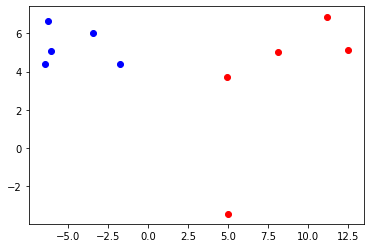

[1. 1. 1. 0. 1. 0. 0. 0. 1. 0.]
[[0 1 4 8 2 9 6 3 5 7]
 [1 0 4 8 2 9 6 3 5 7]
 [2 8 0 1 4 9 3 6 5 7]
 [3 9 5 7 6 2 8 0 4 1]
 [4 0 1 8 2 9 3 6 5 7]
 [5 7 3 9 6 2 8 0 4 1]
 [6 9 3 2 7 5 8 1 0 4]
 [7 5 3 9 6 2 8 0 4 1]
 [8 2 0 4 1 9 3 6 5 7]
 [9 3 2 5 6 7 8 0 1 4]]
[0.3362385  0.71512215]
[ 0.16535875 -1.54660226]
[-2.63758067 -0.94005385]
[-0.3362385  -0.71512215]
[-0.17087975 -2.26172441]
[-2.97381917 -1.655176  ]
[ 1.6749909  -1.66097625]
[ 4.31257157 -0.7209224 ]
[ 4.64881006 -0.00580025]
[3.19382784 1.30299198]
[-3.0588045  -1.88508059]
[-4.41366495 -0.11036816]
[-0.16535875  1.54660226]
[0.17087975 2.26172441]
[-2.80293942  0.60654841]
[-1.35486045  1.77471243]
[3.0588045  1.88508059]
[6.25263234 3.18807258]
[ 0.09574149 -7.15466607]
[-3.09808635 -8.45765805]
[ 6.76727346 -7.82544826]
[ 1.35486045 -1.77471243]
[4.41366495 0.11036816]
[7.60749279 1.41336015]
[-1.6749909   1.66097625]
[2.63758067 0.94005385]
[ 2.80293942 -0.60654841]
[-3.19382784 -1.30299198]
[ 6.67153197 -0.67078219]

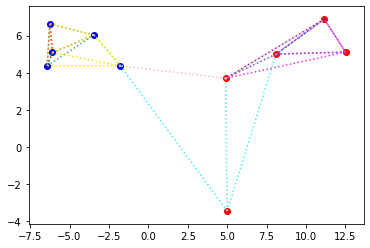

In [52]:
from get_colors import colors

def predict(X, Y, k=3):
    predictions = np.zeros(m)
    min_indices = np.argsort(distances, axis=1)
    print(min_indices)
    all_k_nearest_indices = min_indices[:, 1:k+1]
    for idx, x in enumerate(X):
        k_nearest_indices = all_k_nearest_indices[idx]
        k_nearest = X[k_nearest_indices]
        for neighbour in k_nearest:
            diff = x - neighbour
            print(diff)
            plt.plot(np.array([x[0], neighbour[0]]) ,np.array([x[1], neighbour[1]]), c=colors[idx], linestyle='dotted')
            # plt.show()
        k_nearest_labels = Y[k_nearest_indices]
        prediction = np.mean(k_nearest_labels)
        prediction = prediction.astype(int)
        predictions[idx] = prediction

    # show_ground_truth(X, predictions)
    return predictions

show_ground_truth(X, Y)


print(predictions)
predictions = predict(X, Y, k=3)

def show_predictions(X, predictions):
    show_ground_truth(X, predictions)

show_predictions(X, predictions)

## Limitations of K-nearest neighbours

- We need to find the distance between each point and every other point. The time complexity of the algorithm is dominated by this process, which scales with $O(n^2)$.
- examples that might be close in feature space, may not necessarily be close in label space. 
    - E.g. if examples have similar feature values for features that do not influence the output label, they will be close in feature space, but not in label space. 

- when working with high dimensional data, it will not be easy to visualise the data and hand pick a suitable k.
    

## SkLearn implementation

[K-nearest neighbour docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

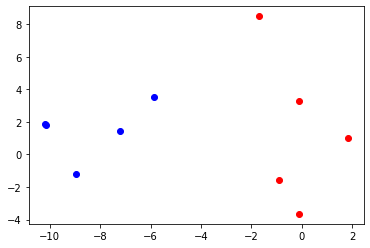

In [61]:
import sklearn.neighbors
k = 3
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X, Y)
predictions = knn.predict(X)
show_predictions(X, predictions)

## K-nearest neighbours for regression

K-nearest neighbours can also perform regression as well as classification.

The only difference is that the predictions are not rounded to represent classification labels.


## Summary
- The K-nearest neighbours algorithm makes predictions by averaging the labels of the K-nearest neighours in feature space.
- K is the number of neighbours which the algorithm will average the labels of. It is a hyperparameter.